# Solutions for Lab Sheet 2 (COM3502-4502-6502 Speech Processing)

This lab sheet is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") by clicking on the icon on the right, but this notebook is displayed best when opened locally using Jupyter Notebook (e.g. as part of the [Anaconda](https://www.anaconda.com/) distribution which is already installed on the lab computers). <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheet-Solutions/Lab-Sheet-2-Solution.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

<div class="alert alert-block alert-success">
<strong>Intended Learning Objectives (ILOs):</strong><br>
    
After completing this Jupyter Notenook you should
    
<ul>
<li>be able to write and call a function in Python
</li>
<li>generate a concert pitch signal
</li>
<li>cut out a desired part from a given vector and concatenate vectors
</li>
<li>understand the concept of signal superposition
</li>
<li>understand the relation between frequency $f$ and notes played by a musical instrument
</li>
<li>understand differences in sampling frequencz $f_s$ and how to resample signals using the <code>librosa</code> library
</li>
    
<li>understand basic use of <code>Python</code> command(s) 
    <ul>
        <li><code>None</code></li>
    </ul> and functions from the <code>Python</code> libraries 
    <ul>
    <li><a href="https://matplotlib.org/"><code>Matplotlib</code></a> for graphical output (like 
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.specgram.html"><code>specgram()</code></a>, 
        etc.)
    </li>
    <li><a href="https://numpy.org/doc/stable/index.html"><code>Numpy</code></a> command 
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html"><code>concatenate()</code></a>, 
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.exp.html"><code>exp()</code></a>,
        etc.
    </li>
    <li><a href="https://librosa.org/doc/main/index.html"><code>librosa</code></a> command 
        <a href="https://librosa.org/doc/main/generated/librosa.resample.html"><code>resample()</code></a>, 
        etc.
    </li>
    </ul>
</li>
</ul>
</div>

In [1]:
# Let's do the ususal necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
# import seaborn as sns; sns.set() # styling (uncomment if you want)
import numpy as np               # math

## Generate sine wave - Tasks 1-4 

The following function `get_sine_wave()` creates a sine signal with a particular frequency $f$.

Just note, it is common practice to describe the functions and its input and output parameters as done here exemplarily in the multi-line comment.

In [2]:
def get_sine_wave(frequency_Hz, length_s=1, fs_Hz=8000):
    """
    Return a sine wave with given parameters.
    
    Parameters
    ----------
    frequency_Hz : float
        frequency $f$ of the sine to be generated 
    length_s : float, optional
        length of the sine signal to be generated, default: 1 sec.
    fs_Hz : float, optional
        sampling frequency $f_s$, default: 8000 Hz

    Returns
    -------
    signal
        generated sine signal
    """
    # create time vector $t$
    time_vector = np.linspace(0, length_s,
                              int(length_s * fs_Hz),
                              endpoint=False)
    # return sine of frequency $f$, i.e. variable frequency_Hz
    return np.sin(2 * np.pi * frequency_Hz * time_vector)

The following code creates and visualises a sine of $f=440$ Hz, the so called [concert pitch](https://en.wikipedia.org/wiki/Concert_pitch "Open Wikipedia for more information on Concert Pitch") or also musical note **A** on a keyboard. 

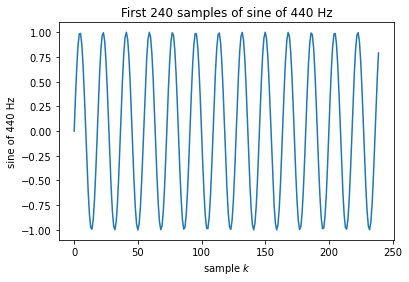

In [3]:
# crate a sine of f=440 Hz at a sampling frequency f_s = 8 kHz of 2 seconds length
concert_pitch = get_sine_wave(440, 2, 8000)
# Look at the first 30 ms (240 / 8000 = 0.03 s) of the generated wave
plt.plot(concert_pitch[:240])
plt.xlabel('sample $k$')
plt.ylabel('sine of 440 Hz')
plt.title('First 240 samples of sine of 440 Hz')
None # This command does nothing but prevents printing the result of previous function call

We can listen to the signal, using the `IPython.display.Audio()` command.

In [4]:
# listen to the sound file 
from IPython import display as ipd
ipd.Audio(concert_pitch, rate=8000)

We can concatenate signals to form a longer signal.
As an example we want to create a new signal with half the concert pitch frequency and then play it 2 times alternating with the concert pitch.

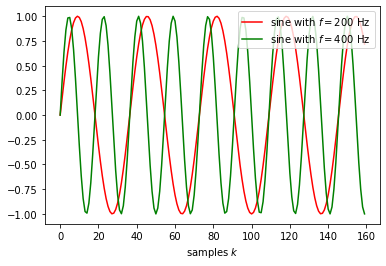

In [5]:
half_concert_pitch = get_sine_wave(220, 2, 8000)
# Look at the first 0.02 s of the signals

plt.plot(half_concert_pitch[:160], "red",label="sine with $f=200$ Hz")
plt.plot(concert_pitch[:160], "green",label="sine with $f=400$ Hz")
plt.xlabel('samples $k$')
plt.legend(loc='upper right') # create a legend showing the line labels 

alternation = np.concatenate((half_concert_pitch, concert_pitch,
                              half_concert_pitch, concert_pitch))
ipd.Audio(alternation, rate=8000)

We can observe that the green `concert_pitch` has a frequency which is exactly double that of the red signal `half_concert_pitch`, i.e. when two periods of green curve fit in one period of red curve (see e.g. between samples $k=0$ and $k \approx 34$).

Adding together two signals gives a signal where both frequencies can be heard.
The resulting signal does not look like a sine wave anymore but we can still clearly see its periodicity. Later in this module (and in later lab sheets) we will analyse the frequency content in the frequency domain and will learn that such signals can be better distinguished in the frequency domain.

The periodicity is so promiment because one frequency is a multiple of the other.
If this is not the case it can take much longer for the signal to repeat its pattern.

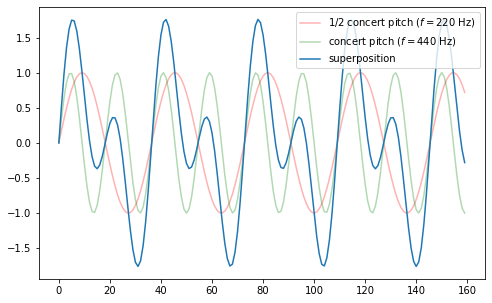

In [6]:
plt.figure(figsize=(8,5)) # create figure of size 8 x 5 inches
plt.plot(half_concert_pitch[:160], "red", alpha=0.3, label='1/2 concert pitch ($f=220$ Hz)')
plt.plot(concert_pitch[:160], "green", alpha=0.3, label='concert pitch ($f=440$ Hz)')
plt.plot(half_concert_pitch[:160] + concert_pitch[:160], label='superposition')
plt.legend(loc='upper right')
ipd.Audio(half_concert_pitch + concert_pitch, rate=8000)

Adding two sine signals with close frequencies looks and sound like this:

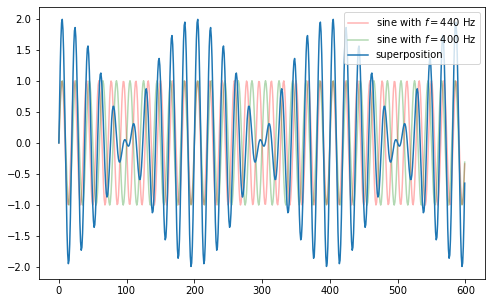

In [7]:
signal_1 = get_sine_wave(440, 2, 8000)
signal_2 = get_sine_wave(400, 2, 8000)
samples = 600                           # samples used for plotting

plt.figure(figsize=(8,5)) # create figure of size 8 x 5 inches
plt.plot(signal_1[:samples], "red", alpha=0.3, label='sine with $f=440$ Hz')
plt.plot(signal_2[:samples], "green", alpha=0.3, label='sine with $f=400$ Hz')
plt.plot(signal_1[:samples] + signal_2[:samples], label='superposition')
plt.legend()

ipd.Audio(signal_1 + signal_2, rate=8000)  # play sum of two (sine) signals

## Damped Sine (Task 5)

A damped sine can be defined as

\begin{equation}
x(t) = \mathrm{sin}(2 \pi f t) \mathrm{e}^{- \alpha t}
\end{equation}

The following code generates a sine signal and a decaying shape. The damped sine signal is generated by multiplying the two signals sample by sample.

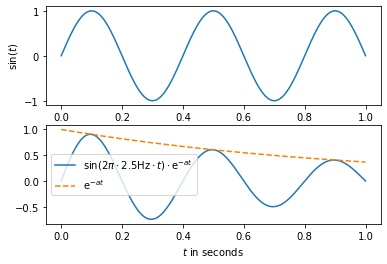

In [8]:
fs=8000
t=np.arange(0,1,1/fs) # crete time vector of 1 second length
f = 2.5               # 2.5 Hz 
alpha = 1             # daming factor (play around with it and see what happens)

sin  = np.sin(2*np.pi*f*t)
damp = np.exp(-alpha*t)
x = sin * damp

plt.subplot(2,1,1)
plt.plot(t,sin)
plt.ylabel('sin($t$)')

plt.subplot(2,1,2)
plt.plot(t,x, label='sin$(2 \pi \cdot ' + str(f) + ' \mathrm{Hz} \cdot t) \cdot \mathrm{e}^{- a t}$')
plt.plot(t,damp, '--', label='$\mathrm{e}^{- a t}$')
plt.legend()
plt.xlabel('$t$ in seconds'); # the ; also suppresses output, try to delete it

In the following we will replay the alternating tones, first without damping.

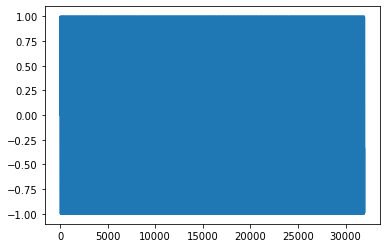

In [9]:
concert_pitch_1sec = get_sine_wave(440, 1, 8000)
half_concert_pitch_1sec = get_sine_wave(220, 1, 8000)

alternation_1sec = np.concatenate((half_concert_pitch_1sec, concert_pitch_1sec,
                                     half_concert_pitch_1sec, concert_pitch_1sec))

#plot the tune
plt.plot(alternation_1sec) # you can't see much here, it will get clear together with the next plot

ipd.Audio(alternation_1sec, rate=8000)

Below we can observe the effect of dampening on musical tones - the dampened sythesised tune sounds more 'natural'.
(This technique is used in MIDI instument sythesis).

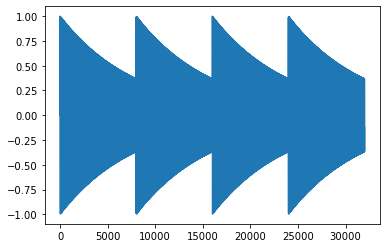

In [10]:
alternation_damped = np.concatenate((half_concert_pitch_1sec* damp, concert_pitch_1sec* damp,
                                     half_concert_pitch_1sec* damp, concert_pitch_1sec* damp))

#plot the tune
plt.plot(alternation_damped)

ipd.Audio(alternation_damped, rate=8000)

## Play a song (Task 6 and 7)

By generating sine waves of different lengths and frequencies with the `get_sine_wave()` function, you are now able to play simple songs.

As already described in the lab sheet each note has a fundamental [frequency](https://pages.mtu.edu/~suits/notefreqs.html), e.g. as in the following table. Those frequencies are used in the code snippet below.

| note      | ... |  G3  |  A3  |   B3   |   C4   |   D4   |   E4   |   F4   |   G4   |     A4  |  ...  |
| --------- | --- | ---- | ---- | ------ | ------ | ------ | ------ | ------ | ------ | ------- |  ---- |
| $f$ in Hz | ... | 196  |  220 | 246.94 | 261.63 | 293.66 | 329.63 | 349.23 | 392.00 | **440** |  ...  |

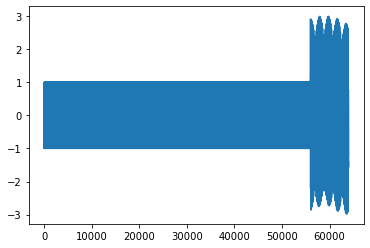

In [11]:
#create musical notes 
g = get_sine_wave(196.00)
a = get_sine_wave(220)
b = get_sine_wave(246.94)
d = get_sine_wave(293.66)
c = get_sine_wave(261.63)
e = get_sine_wave(329.63)
#append together to form tune + chord 
tune = [b,d,a,g,a,b,d,(g+b+d)]
tune = np.concatenate(tune)
#plot the tune
plt.plot(tune)
#audio player for the tune 
ipd.Audio(tune,rate=8000) 

Below we can again observe the effect of dampening on musical tones.

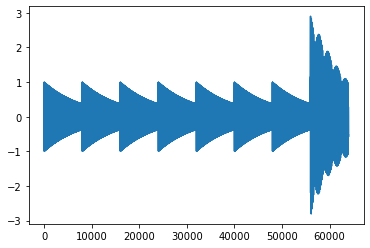

In [12]:
#create dampened musical notes 
g = get_sine_wave(196.00)*damp
a = get_sine_wave(220)*damp
b = get_sine_wave(246.94)*damp
d = get_sine_wave(293.66)*damp
c = get_sine_wave(261.63)*damp
e = get_sine_wave(329.63)*damp

#create tune 
tune = [b,d,a,g,a,b,d,(g+b+d)]
tune = np.concatenate(tune)
#plot dampened tune waveform
plt.plot(tune)
#audio player for dampened tune
ipd.Audio(tune,rate=8000) 

### Optional task: Play a (more complicated) song "with both hands"

This is a task would have taken more time than you have during the lab time. Therefore, here only a demo is given (for those interested). Feel free to ingore the following up to Task 8 (see below). 

The following figure visualises the first notes we will play using both hands. The *(right) hand* is described by the following notes and pauses:


<img src="music-notes-begin.png" align="center"/>
<center><span style="font-size:smaller">
    Figure 1. Begin of notes for a song to be played in the following.
</span></center>

| note   |  E5  |  D#5 |  E5  |  D#5 |  E5  |  B4  |  D5  |  C5  |  A4  |  Pause  | ...  |
| ------ | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ------- | ---- |
| length | 1/16 | 1/16 | 1/16 | 1/16 | 1/16 | 1/16 | 1/16 | 1/16 | 1/8  |  1/16   | ...  |

Lengths of notes are given by halving:
A half note has half the length as a whole note, a quarter note is half a half note (or quarter of a whole note), etc. Note durations can also be more complex in general, such as 3/4 or 3/2.

For the following song you should choose an appropriate `fs_Hz` and duration for the whole note. Specifically make sure that multiplying the `fs_Hz` with the duration of the sixteenth note gives an integer result with no rounding required.
    
- E5 1/16, D#5 1/16
- E5 1/16, D#5 1/16, E5 1/16, B4 1/16, D5 1/16, C5 1/16
- A4 1/8, Pause 1/16, C4 1/16, E4 1/16, A4 1/16
- B4 1/8, Pause 1/16, E4 1/16, G#4 1/16, B4 1/16
- C4 1/8, Pause 1/16, E4 1/16, E5 1/16, D#5 1/16
- E5 1/16, D#5 1/16, E5 1/16, B4 1/16, D5 1/16, C5 1/16
- A4 1/8, Pause 1/16, C4 1/16, E4 1/16, A4 1/16
- B4 1/8, Pause 1/16, E4 1/16, C5 1/16, B4 1/16
- A4 1/4

The other part (the *left hand*) is described as follows:
- Pause 1/8
- Pause 3/8
- A2 1/16, E3 1/16, A3 1/16, Pause 3/16
- E2 1/16, E3 1/16, G#3 1/16, Pause 3/16
- A2 1/16, E3 1/16, B3 1/16, Pause 3/16
- Pause 3/8
- A2 1/16, E3 1/16, A3 1/16, Pause 3/16
- E2 1/16, E3 1/16, G#3 1/16, Pause 3/16
- A2 1/16, E3 1/16, B3 1/16, Pause 1/16

In the following code piece we only store the notes and their respective lengts (as `Python` tuples `(a,b)`) in two arrays (one for the notes to be 'played' by the right hand and one for notes to be played by the left hand).

In [13]:
right_hand_notes = [
    ("E5", 1 / 16),
    ("D#5", 1 / 16),
    ("E5", 1 / 16),
    ("D#5", 1 / 16),
    ("E5", 1 / 16),
    ("B4", 1 / 16),
    ("D5", 1 / 16),
    ("C5", 1 / 16),
    ("A4", 1 / 8),
    ("Pause", 1 / 16),
    ("C4", 1 / 16),
    ("E4", 1 / 16),
    ("A4", 1 / 16),
    ("B4", 1 / 8),
    ("Pause", 1 / 16),
    ("E4", 1 / 16),
    ("G#4", 1 / 16),
    ("B4", 1 / 16),
    ("C4", 1 / 8),
    ("Pause", 1 / 16),
    ("E4", 1 / 16),
    ("E5", 1 / 16),
    ("D#5", 1 / 16),
    ("E5", 1 / 16),
    ("D#5", 1 / 16),
    ("E5", 1 / 16),
    ("B4", 1 / 16),
    ("D5", 1 / 16),
    ("C5", 1 / 16),
    ("A4", 1 / 8),
    ("Pause", 1 / 16),
    ("C4", 1 / 16),
    ("E4", 1 / 16),
    ("A4", 1 / 16),
    ("B4", 1 / 8),
    ("Pause", 1 / 16),
    ("E4", 1 / 16),
    ("C5", 1 / 16),
    ("B4", 1 / 16),
    ("A4", 1 / 4),
]

left_hand_notes = [
    ("Pause", 1 / 8),
    ("Pause", 3 / 8),
    ("A2", 1 / 16),
    ("E3", 1 / 16),
    ("A3", 1 / 16),
    ("Pause", 3 / 16),
    ("E2", 1 / 16),
    ("E3", 1 / 16),
    ("G#3", 1 / 16),
    ("Pause", 3 / 16),
    ("A2", 1 / 16),
    ("E3", 1 / 16),
    ("B3", 1 / 16),
    ("Pause", 3 / 16),
    ("Pause", 3 / 8),
    ("A2", 1 / 16),
    ("E3", 1 / 16),
    ("A3", 1 / 16),
    ("Pause", 3 / 16),
    ("E2", 1 / 16),
    ("E3", 1 / 16),
    ("G#3", 1 / 16),
    ("Pause", 3 / 16),
    ("A2", 1 / 16),
    ("E3", 1 / 16),
    ("B3", 1 / 16),
    ("Pause", 1 / 16),
]

Another Song in the following. Hint, you can ask ChatGPT to create note in the following style for your favourite song.

In [ ]:
"""
right_hand_notes = [
    ("E5", 1 / 16), ("E5", 1 / 16), ("E5", 1 / 8), ("E5", 1 / 16), ("E5", 1 / 16), ("E5", 1 / 8), ("E5", 1 / 16), ("G5", 1 / 16), 
    ("C5", 1 / 16), ("D5", 1 / 16), ("E5", 1 / 4), ("F5", 1 / 16), ("F5", 1 / 16), ("F5", 1 / 16), ("F5", 1 / 16), ("F5", 1 / 16), 
    ("E5", 1 / 16), ("E5", 1 / 16), ("E5", 1 / 32), ("E5", 1 / 32), ("E5", 1 / 16), ("D5", 1 / 16), ("D5", 1 / 16), ("E5", 1 / 16), 
    ("D5", 1 / 8), ("G5", 1 / 8), ("E5", 1 / 16), ("E5", 1 / 16), ("E5", 1 / 8), ("E5", 1 / 16), ("E5", 1 / 16), ("E5", 1 / 8),
    ("E5", 1 / 16), ("G5", 1 / 16), ("C5", 1 / 16), ("D5", 1 / 16), ("E5", 1 / 4),
]

left_hand_notes = [
    ("C4", 1 / 8), ("G3", 1 / 8), ("C4", 1 / 8), ("G3", 1 / 8), ("C4", 1 / 16), ("C4", 1 / 16), ("C4", 1 / 16), ("G3", 1 / 16),
    ("C4", 1 / 8), ("G3", 1 / 8), ("C4", 1 / 8), ("G3", 1 / 8), ("F3", 1 / 16), ("F3", 1 / 16), ("F3", 1 / 16), ("C4", 1 / 16),
    ("F3", 1 / 16), ("F3", 1 / 16), ("F3", 1 / 16), ("G3", 1 / 16), ("C4", 1 / 8), ("G3", 1 / 8), ("C4", 1 / 8), ("G3", 1 / 8),
]
"""

A simple additional feature we need to generate a more advances song is a function to generate silence. The following function `get_silence()` generates an array of $0$-values of the desired length (in seconds).

In [14]:
def get_silence(length_s, sample_rate_hz):
    """Return silence for the given length at the given sample rate."""
    return np.zeros(int(length_s * sample_rate_hz))

Now we can define a function which creates either the desired note or a pause, defined by the descriptions for `left_hand_notes` and `right_hand_notes` above.

Note that the desired signal frequency is calculated by 
\begin{equation}
f = 440 \cdot 2 ^{(\mathrm{note-position} / 12) + (\mathrm{octave} - 4)}
\end{equation}
which is used in the function below.

In [15]:
def create_tone(note, duration):
    
    tempo = 5

    if note == "Pause":
        return get_silence(length_s=duration*tempo, sample_rate_hz=8000)

    note_position = {
        "C": -9,
        "C#": -8,
        "D": -7,
        "D#": -6,
        "E": -5,
        "F": -4,
        "F#": -3,
        "G": -2,
        "G#": -1,
        "A": 0,
        "A#": 1,
        "B": 2,
    }

    octave = int(note[-1])
    key = note[:-1]

    frequency_hz = 440 * 2 ** ((note_position[key] / 12) + (octave - 4))

    return get_sine_wave(frequency_Hz=frequency_hz, length_s=duration*tempo, fs_Hz=8000)

Create one test tone to see if the function above works as expected.

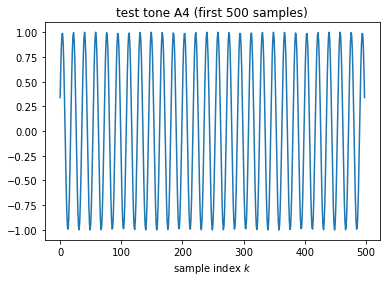

In [16]:
test_tone=create_tone("A4", 1/8)

plt.plot(test_tone[1:500])
plt.title('test tone A4 (first 500 samples)')
plt.xlabel('sample index $k$')
ipd.Audio(test_tone, rate=8000)

And now let's go for a whole song.

In [17]:
right_hand = np.concatenate(
    [create_tone(note, duration) for note, duration in right_hand_notes]
)

left_hand = np.concatenate(
    [create_tone(note, duration) for note, duration in left_hand_notes]
)

We can add both hands of the song together to obtain the full song.

In [18]:
minlength= min(len(left_hand), len(right_hand)) # cut to same length if necessary
song = left_hand[:minlength]+ right_hand[:minlength]
ipd.Audio(song, rate=8000)

If you like you can now change the code above to include damping.

## Tasks 8 - Different Sampling Frequencies

The following (already known) commands can be used to do download a WAVE file to hard disk and the into memory.

Please note that if you want to pass on the variable `file_name` to the `curl` command, you have to put it in curly brackets. This allows you to re-use the download command

```Python
file_name = 'music_44k.wav'
!curl https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/{file_name} -o {file_name}
```

in later Jupyter Notebook lab sheets.

In [19]:
import soundfile as sf # for loading wave files from hard disk

# download
file_name = 'music_44k.wav'
print('Downloading file: ' + file_name)
!curl https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/{file_name} -o {file_name}

# load WAVE files
mus_44k, fs44 = sf.read(file_name)

print('The sampling frequency is ' + str(fs44) + ' Hz')

The sampling frequency is 44100 Hz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  435k  100  435k    0     0  14.8M      0 --:--:-- --:--:-- --:--:-- 15.1M


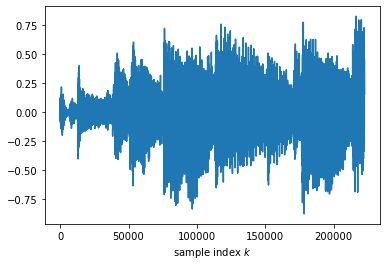

In [20]:
# This is how our speech signal looks like
plt.plot(mus_44k);
plt.xlabel('sample index $k$');

We use the `librosa` library to change the sampling frequency $f_s$. The following code down-samples the sound signal to $f_s=8$ kHz first. By doing this, all information above $f_{\mathrm{max}}=4$ kHz, i.e. half of the sampling frequency, is lost. Even if we upsample to the origial sampling frequency of $f_s=44.1$ kHz again, the lost information is not recovered. 

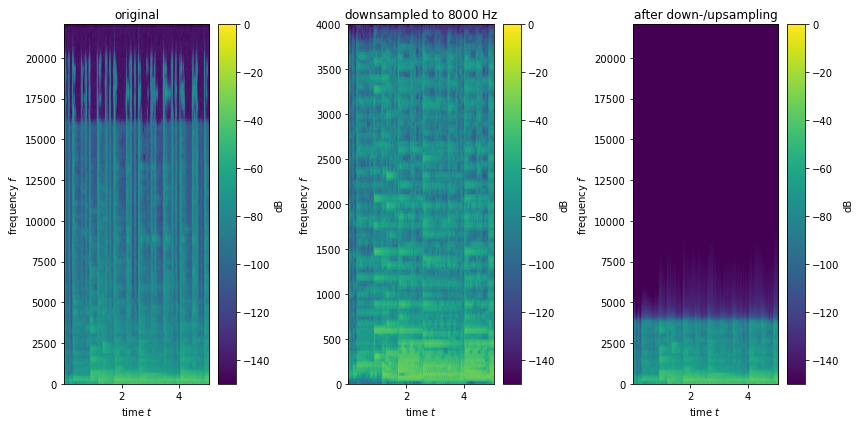

In [21]:
import librosa         # we will use the library librosa here for resampling

#donwsample from 44.1 kHz to 8 kHz
mus_8k = librosa.resample(mus_44k, orig_sr=fs44, target_sr=8000); # resample to 8 kHz
#upsample from 8 kHz to 44.1 kHz
mus_44k_2 = librosa.resample(mus_8k, orig_sr=8000, target_sr=fs44); # resample to 44.1 kHz

# visualise
fig=plt.figure(figsize=(12,6)) # create a figure of size 12 x 6 inches

plt.subplot(1,3,1)
plt.specgram(mus_44k, Fs=fs44);
plt.title('original')
plt.xlabel('time $t$')
plt.ylabel('frequency $f$')

plt.colorbar(label='dB');
plt.clim(-150,0)

plt.subplot(1,3,2)
plt.specgram(mus_8k, Fs=8000);
plt.title('downsampled to $8000$ Hz')
plt.xlabel('time $t$')
plt.ylabel('frequency $f$')

plt.colorbar(label='dB');
plt.clim(-150,0)

plt.subplot(1,3,3)
plt.specgram(mus_44k_2, Fs=fs44);
plt.title('after down-/upsampling')
plt.xlabel('time $t$')
plt.ylabel('frequency $f$')

plt.colorbar(label='dB');
plt.clim(-150,0)

plt.tight_layout() # this command ensures that labelsdon't overlap

The three time-frequency representations ([spectrograms](https://en.wikipedia.org/wiki/Spectrogram)) above visualise the effects of down- and upsampling. The left panel shows the sectrogram of the original wave file sampled at $f_s=44100 \,\mathrm{Hz}$. You can see that energy is present in the signal up to frequencies of $\frac{1}{2} f_s = 22050 \, \mathrm{Hz}$ (as defined by the <a href="https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem">Nyquist-Shannon sampling theorem</a>: $f_{\mathrm{max}} = \frac{1}{2} f_s$). The middle panel shows the signal downsampled to $f_s=8000 \,\mathrm{Hz}$, therefore signal energy up to frequencies of $f_{\mathrm{max}}=4000 \,\mathrm{Hz}$ are present in the signal (see different $y$-axis). After upsampling this signal again to the original sampling frequency of $f_s=44100 \,\mathrm{Hz}$ (cf. right panel) you see that the signal energy in frequencies higher than $f=4000 \,\mathrm{Hz}$ are not restored again, but lost in the down-/upsampling process.

This can be perceived by playing the audio files. We play the original file first.

In [22]:
ipd.Audio(mus_44k, rate=fs44)

After it has been converted to $8  \,\mathrm{kHz}$ sampling frequency and then back to $44.1 \,\mathrm{kHz}$ the higher frequencies (precisely everything above $4  \,\mathrm{kHz}$ is missing:

In [23]:
ipd.Audio(mus_44k_2, rate=fs44)

## Copyright

This notebook is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) to be used during the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield"). You may download, [clone](https://docs.github.com/en/repositories/creating-and-managing-repositories/cloning-a-repository) or [fork](https://docs.github.com/en/get-started/quickstart/fork-a-repo) it to your computer or private [GitHub](https://github.com/) account. 

### Contributors
[Stefan Goetze](http://www.stefan-goetze.de "Web page of Stefan Goetze"),
[Lena Strobl](https://github.com/sleyna/),
[George L. Close](http://staffwww.dcs.shef.ac.uk/people/G.Close/ "Web page of George L. Close")